*Credits: Applied Data Analysis (ADA) course at EPFL (https://dlab.epfl.ch/teaching/fall2020/cs401/)*

## Clustering with K-Means

In this tutorial, you will learn how to discover clusters in data using `Python` and `Scikit-learn`

|*|continuous|categorical|
|---|---|---|
|**supervised**|regression|classification|
|**unsupervised**|dim. reduction|**clustering**|

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

%matplotlib inline

Let's start by creating some **[synthetic](https://en.wikipedia.org/wiki/Synthetic_data)** data!
First, we create a super secret number that represents the number of the cluster to generate. 

Don't print it! We'll try to discover it automatically.

In [2]:
random.seed(42)
top_secret_number = random.randint(2, 10)

Now we can generate some data distributed in _top\_secret\_number_ groups:

In [3]:
total_samples = 100

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)

X[:3]

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

Let's see how these clusters look like and where is their center:

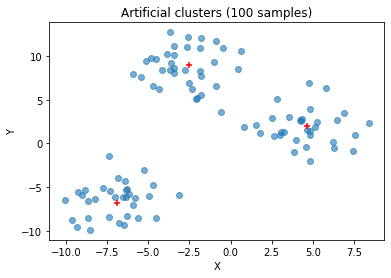

In [4]:
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red")

### Clustering the data
How many clusters do you see? Probably easy for a human, but not so trivial for a computer. 

Let's try to group the data with K-Means. Recall that K-Means requires you to specify the number of clusters (K). Let's start by testing multiple values between 1 and 9.

Fill in the required code to declare a K-Means model with `sklearn` and fit it to the data. For this, make use of the function `KMeans` and the already well-known `.fit()`. Please, choose a _random\_state_ of 42. Check out the documentation for more info: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Remark:** the kmeans object attribute `labels_` is an array with the label values for each point. On the other hand `cluster_centers_` contains the coordinates of the centroids for each of the clusters. You can check out these attributes and more in the documentation.

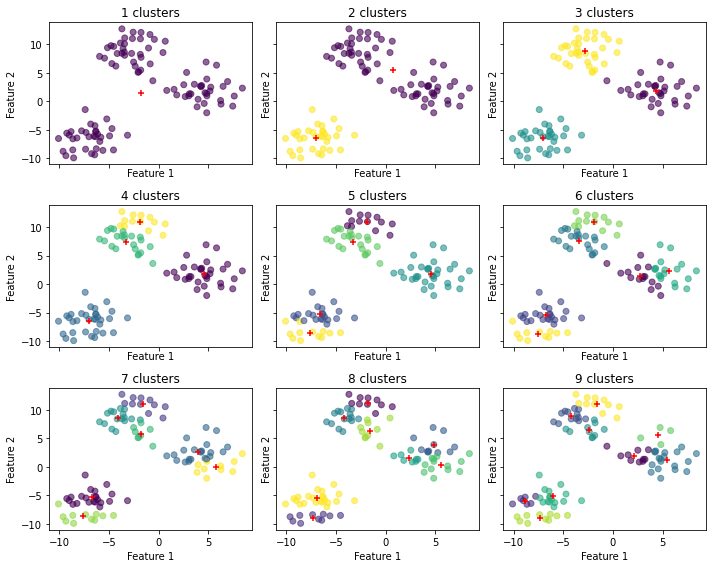

In [5]:
MIN_CLUSTERS = 1
MAX_CLUSTERS = 9

# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    
    # Cluster the data with the current number of clusters
    '''
    FILL IN YOUR CODE HERE
    '''
    # Declare the K-Means model
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    # Train it
    kmeans.fit(X)
    
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmeans.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    # Plot the centroids
    for c in kmeans.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

### How to select K in K-Means?

You have a couple of options:
- Silhouette score: Find the K with the desired tradeoff between the number of clusters and cohesion/separation.
- Elbow method: Find the "elbow" in the curve of the Sum of Squared Errors

Let's see what we can observe using the Elbow method.

#### Elbow method

The function below computes the SSE for different values of K, and plots its distribution. Complete ir by declaring a K-Means model for each value, training it using the training data, and extracting the SSE.

*Hint:* the kmeans object has an attribute containing the Sum of Squared Errors. Check again the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find this out.

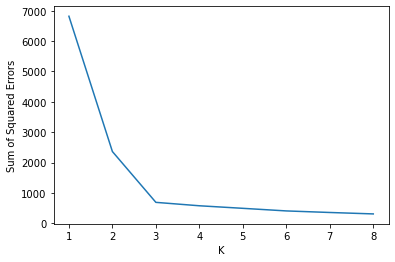

In [9]:
def plot_sse(features_X, start=1, end=9):
    sse_array = []
    for k in range(start, end):
        '''
        FILL IN YOUR CODE HERE
        '''
        # Declare the K-Means model. Choose random_state=10
        kmeans = KMeans(n_clusters=k, random_state=10)
        # Train it
        kmeans.fit(features_X)
        # Extract the Sum of Squared Errors
        sse = kmeans.inertia_
        
        sse_array.append({"k": k, "sse": sse})

    sse_array = pd.DataFrame(sse_array)
    # Plot the data
    plt.plot(sse_array.k, sse_array.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    
plot_sse(X)

**Quiz**: Which would be the optimal number of clusters k given by the elbow method?

` Your answer here ` 3

Let's plot the clusters:

In [10]:
optimal_k = 3

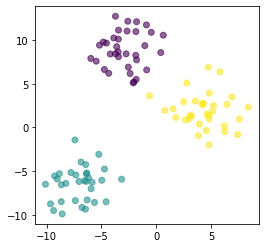

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)

# Plot the clusters with optimal K
labels = KMeans(n_clusters=optimal_k, random_state=0).fit_predict(X)
axs.scatter(X[:,0], X[:,1], c=labels, alpha=0.6)

Ultimately it is up to you (domain expert!) to pick the number of clusters that better represent the data.